In [17]:
import pandas as pd

In [28]:
df = pd.read_csv("./ppo/log_test.txt", delimiter='\t', header=None)
df.head()

,0,1,2,3,4,5,6
0,0,-466.671172,-175.758351,-57.540914,-38.821348,-4.682851,-2.29296
1,500,-43.860351,-15.765749,-2.841930,-0.577851,0.000600,0.00060
2,1000,-6.019559,-0.559453,-0.193521,0.000600,0.000600,0.00060
3,1500,-38.349183,-3.649853,-1.073830,-0.343672,0.000600,0.00060
4,2000,-16.251727,-1.500596,-0.624234,-0.220718,0.000600,0.00060


In [29]:
def smooth(scalars, weight: float):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

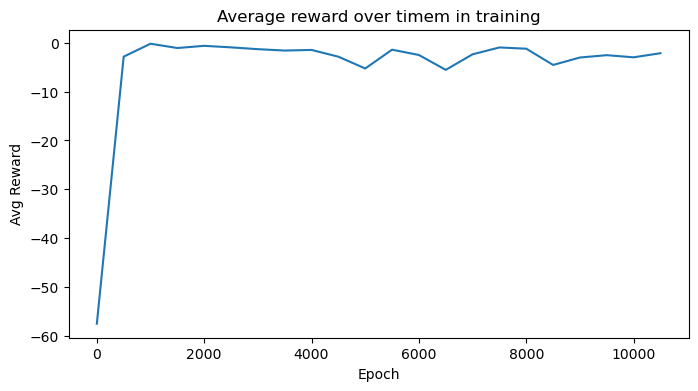

In [30]:
import matplotlib.pyplot as plt

# Set the dimensions of the plot
plt.figure(figsize=(8, 4))  # Width=8 inches, Height=4 inches

# Create a line plot
plt.plot(df[0][:200], df[3][:200])
# plt.plot(df[0], df[3])

# Adding title and labels
plt.title('Average reward over timem in training')
plt.xlabel('Epoch')
plt.ylabel('Avg Reward')

# Show the plot
plt.savefig("reward_over_time.png", dpi=600)
plt.show()